<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/BT2_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d859a4ac50c50630998aace1babe14b7080280236eb746bc52a7536f2549702e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

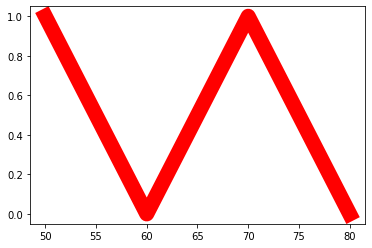

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
slow1 = fuzz.trimf(x,[50,50,60])
slow2 = fuzz.trimf(x,[60,70,80])
plt.figure()
plt.plot(x,slow1+slow2,'r',linewidth=15, label='slow')
plt.plot

32.4271312973696


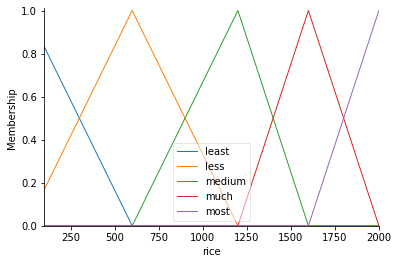

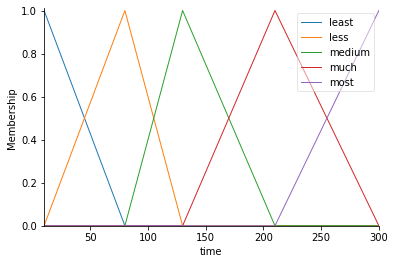

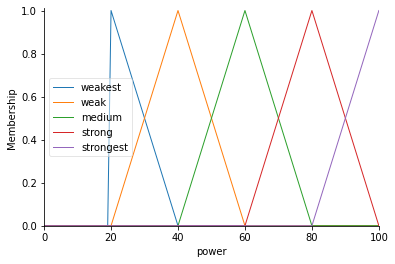

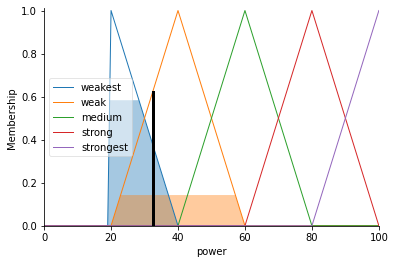

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
rice=ctrl.Antecedent(np.arange(100,2001,1),'rice')
time=ctrl.Antecedent(np.arange(10,301,1),'time')
power=ctrl.Consequent(np.arange(0,101,1),'power')
rice['least']=fuzz.trimf(rice.universe,[0,0,600])
rice['less']=fuzz.trimf(rice.universe,[0,600,1200])
rice['medium']=fuzz.trimf(rice.universe,[600,1200,1600])
rice['much']=fuzz.trimf(rice.universe,[1200,1600,2000])
rice['most']=fuzz.trimf(rice.universe,[1600,2000,2000])
time['least']=fuzz.trimf(time.universe,[10,10,80])
time['less']=fuzz.trimf(time.universe,[10,80,130])
time['medium']=fuzz.trimf(time.universe,[80,130,210])
time['much']=fuzz.trimf(time.universe,[130,210,300])
time['most']=fuzz.trimf(time.universe,[210,300,300])
power['weakest']=fuzz.trimf(power.universe,[20,20,40])
power['weak']=fuzz.trimf(power.universe,[20,40,60])
power['medium']=fuzz.trimf(power.universe,[40,60,80])
power['strong']=fuzz.trimf(power.universe,[60,80,100])
power['strongest']=fuzz.trimf(power.universe,[80,100,100])
rice.view()
time.view()
power.view()
rule1=ctrl.Rule(rice['least']&time['least'], power['weakest'])
rule2=ctrl.Rule(rice['least']&time['less'], power['weakest'])
rule3=ctrl.Rule(rice['least']&time['medium'], power['weak'])
rule4=ctrl.Rule(rice['least']&time['much'], power['weak'])
rule5=ctrl.Rule(rice['least']&time['most'], power['medium'])
rule6=ctrl.Rule(rice['less']&time['least'], power['weakest'])
rule7=ctrl.Rule(rice['less']&time['less'], power['weak'])
rule8=ctrl.Rule(rice['less']&time['medium'], power['weak'])
rule9=ctrl.Rule(rice['less']&time['much'], power['weak'])
rule10=ctrl.Rule(rice['less']&time['most'], power['medium'])
rule11=ctrl.Rule(rice['medium']&time['least'], power['medium'])
rule12=ctrl.Rule(rice['medium']&time['less'], power['medium'])
rule13=ctrl.Rule(rice['medium']&time['medium'], power['strong'])
rule14=ctrl.Rule(rice['medium']&time['much'], power['strong'])
rule15=ctrl.Rule(rice['medium']&time['most'], power['strongest'])
rule16=ctrl.Rule(rice['much']&time['least'], power['medium'])
rule17=ctrl.Rule(rice['much']&time['less'], power['medium'])
rule18=ctrl.Rule(rice['much']&time['medium'], power['strong'])
rule19=ctrl.Rule(rice['much']&time['much'], power['strong'])
rule20=ctrl.Rule(rice['much']&time['most'], power['strongest'])
rule21=ctrl.Rule(rice['most']&time['least'], power['strong'])
rule22=ctrl.Rule(rice['most']&time['less'], power['strong'])
rule23=ctrl.Rule(rice['most']&time['medium'], power['strongest'])
rule24=ctrl.Rule(rice['most']&time['much'], power['strongest'])
rule25=ctrl.Rule(rice['most']&time['most'], power['strongest'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice']=250
powering.input['time']=20
powering.compute()
print(powering.output['power'])
power.view(sim=powering)


16.54901960784313


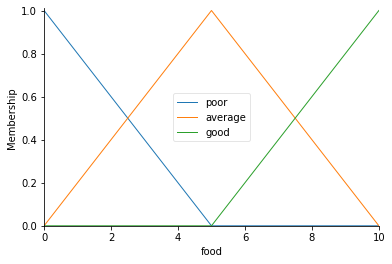

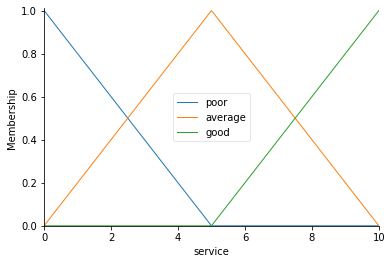

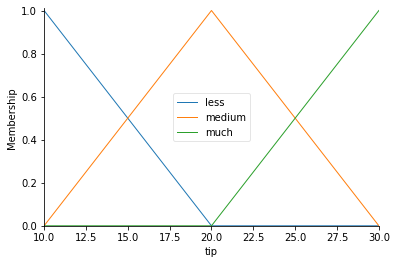

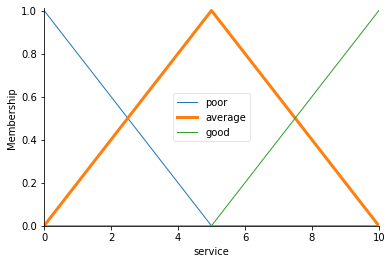

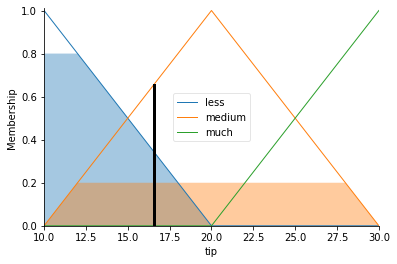

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['medium']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor']&service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'], tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'], tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'], tip['less'])
rule5=ctrl.Rule(food['average']&service['average'], tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'], tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'], tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'], tip['much'])
rule9=ctrl.Rule(food['good']&service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=1
tipping.input['service']=1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
